In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. Cargar imagen en color
img = cv2.imread("../../datos/el_diego.jpg")
if img is None:
    raise ValueError("La imagen no se cargó. Verifica el nombre o ruta del archivo.")

In [4]:
# Convertir de BGR a RGB para visualizar con matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
# 2. Acceder y mostrar los canales RGB
R, G, B = cv2.split(img_rgb)

In [6]:
# Convertir a HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(img_hsv)

In [7]:
# 3. Slicing: cambiar color en un rectángulo (ej. esquina superior izquierda)
img_mod = img_rgb.copy()
img_mod[50:150, 50:150] = [255, 0, 0]  # Rojo

In [8]:
# 4. Slicing: copiar una región y pegarla en otro lugar
height, width = img_rgb.shape[:2]
roi = img_rgb[50:150, 50:150].copy()
if 200 + roi.shape[0] <= height and 200 + roi.shape[1] <= width:
    img_mod[200 : 200 + roi.shape[0], 200 : 200 + roi.shape[1]] = roi
else:
    print("La región destino está fuera de los límites de la imagen.")

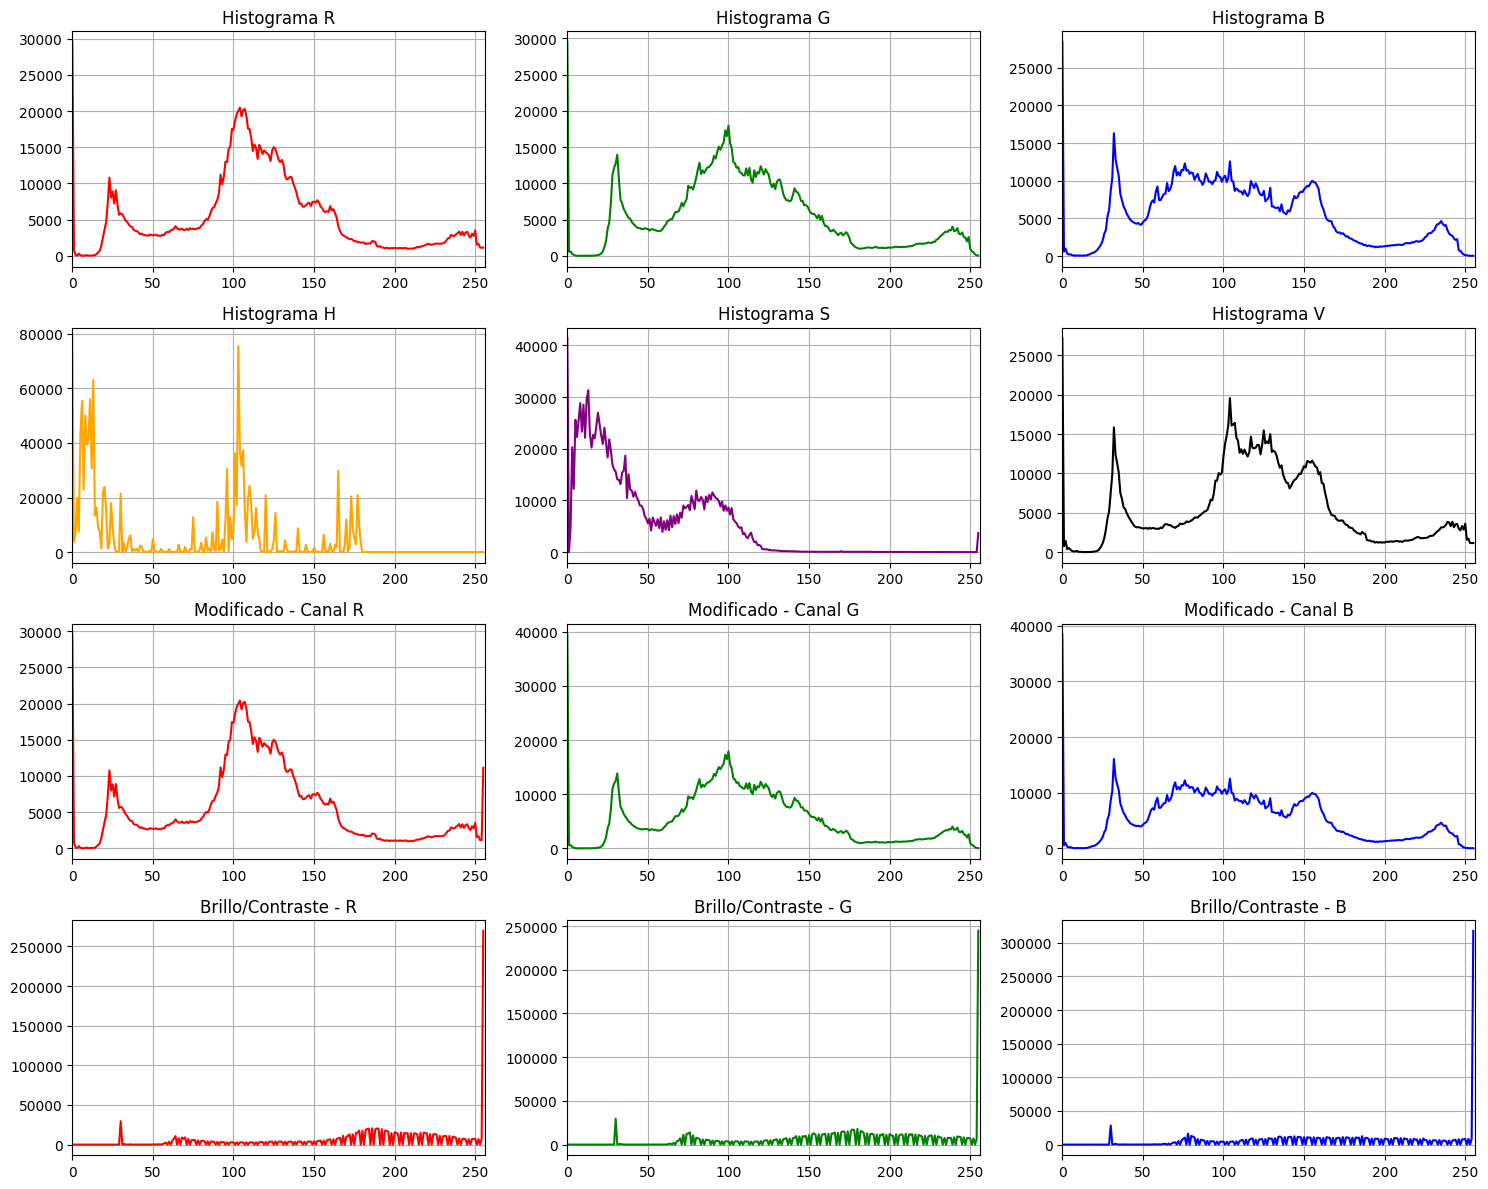

In [9]:
alpha = 1.5
beta = 30
bright_contrast_manual = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)
R_mod, G_mod, B_mod = cv2.split(bright_contrast_manual)
channels = [
    (R, "Histograma R", "red"),
    (G, "Histograma G", "green"),
    (B, "Histograma B", "blue"),
    (H, "Histograma H", "orange"),
    (S, "Histograma S", "purple"),
    (V, "Histograma V", "black"),
    (img_mod[:, :, 0], "Modificado - Canal R", "red"),
    (img_mod[:, :, 1], "Modificado - Canal G", "green"),
    (img_mod[:, :, 2], "Modificado - Canal B", "blue"),
    (R_mod, "Brillo/Contraste - R", "red"),
    (G_mod, "Brillo/Contraste - G", "green"),
    (B_mod, "Brillo/Contraste - B", "blue")
]

# 3. Graficar todos los histogramas en una grilla
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, (channel, title, color) in enumerate(channels):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    axes[i].plot(hist, color=color)
    axes[i].set_title(title)
    axes[i].set_xlim([0, 256])
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Visualización independiente de cada imagen
def show_image(image, title, cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

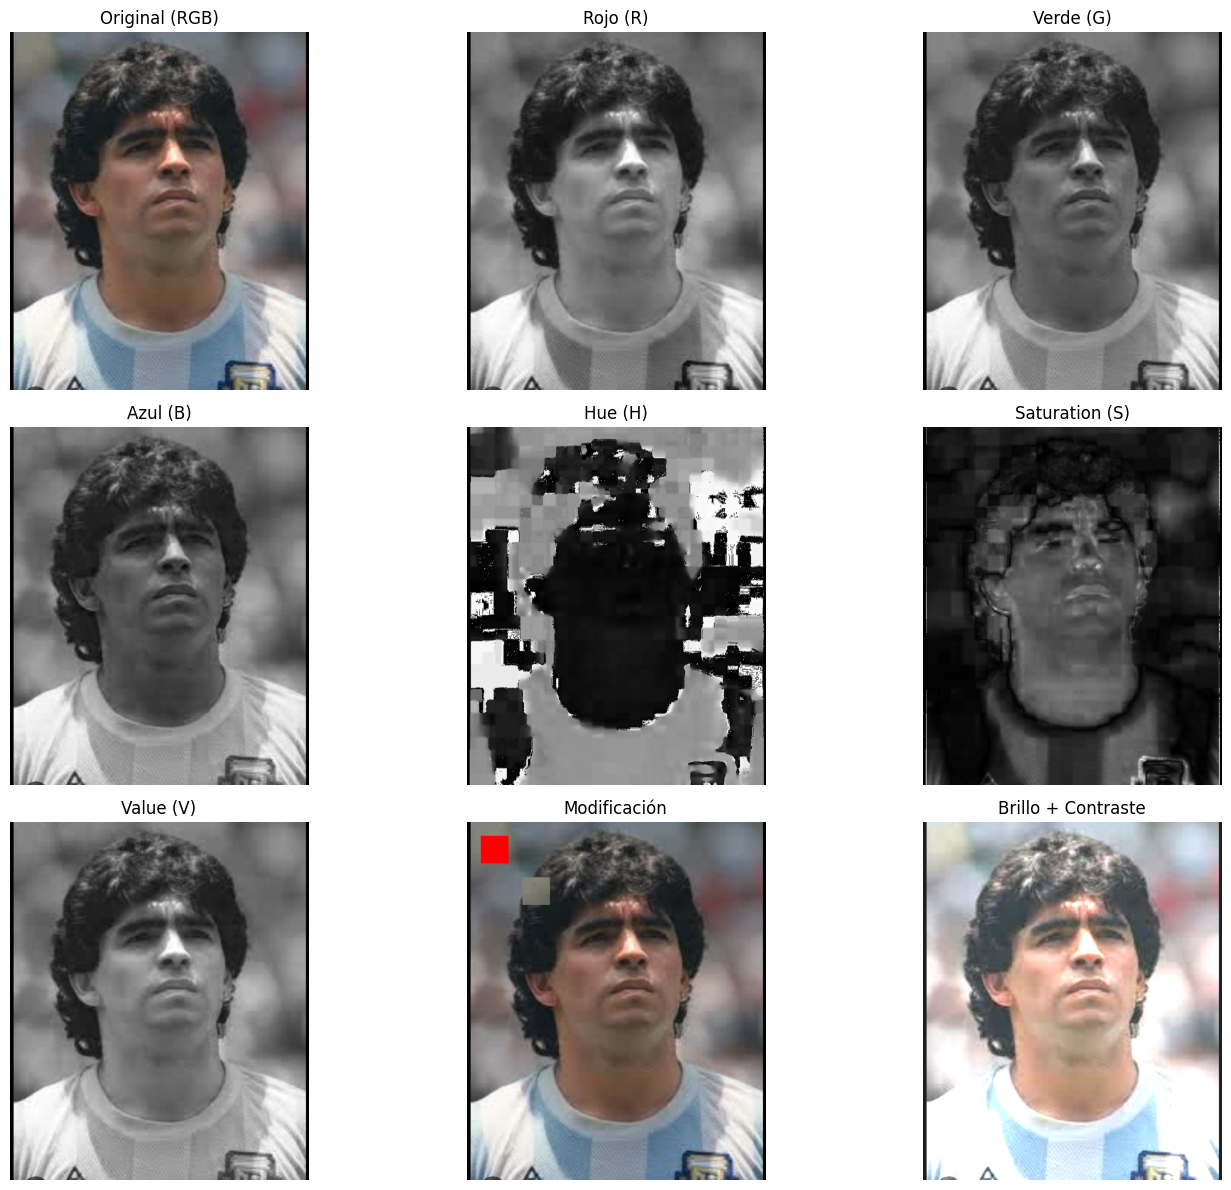

In [11]:
images = [
    (img_rgb, "Original (RGB)"),
    (R, "Rojo (R)"),
    (G, "Verde (G)"),
    (B, "Azul (B)"),
    (H, "Hue (H)"),
    (S, "Saturation (S)"),
    (V, "Value (V)"),
    (img_mod, "Modificación"),
    (bright_contrast_manual, "Brillo + Contraste")
]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, (image, title) in enumerate(images):
    cmap = "gray" if len(image.shape) == 2 else None
    axes[i].imshow(image, cmap=cmap)
    axes[i].set_title(title)
    axes[i].axis("off")

plt.tight_layout()
plt.show()